In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df=pd.read_csv("loan_prediction_training_data.csv")

In [7]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [9]:
# df_no_G_M=df.drop(columns=['Gender','Married'])
# df_no_G_M.to_csv('loan_prediction_training_data_no_G_M.csv')

<AxesSubplot: >

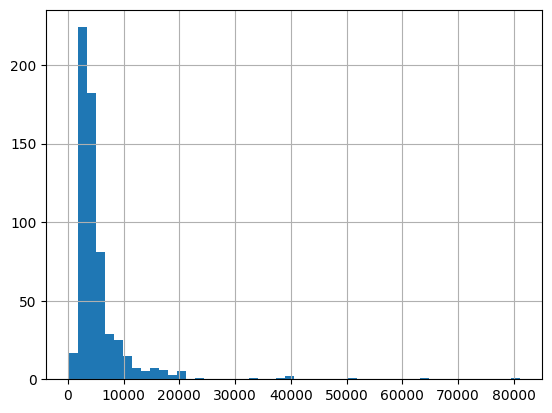

In [10]:
df['ApplicantIncome'].hist(bins=50)

<AxesSubplot: title={'center': 'ApplicantIncome'}, xlabel='Education'>

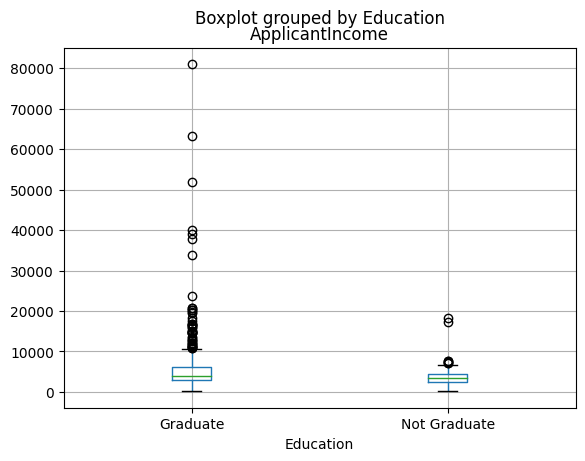

In [11]:
df.boxplot(column='ApplicantIncome',by='Education')

<AxesSubplot: title={'center': 'ApplicantIncome'}, xlabel='Self_Employed'>

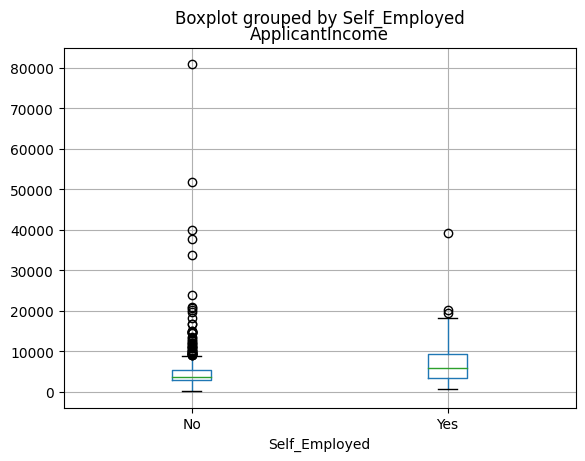

In [12]:
df.boxplot(column='ApplicantIncome',by='Self_Employed')

In [13]:
temp1=df['Credit_History'].value_counts(ascending=True)
temp1

0.0     89
1.0    475
Name: Credit_History, dtype: int64

In [14]:
temp2=df.pivot_table(values='Loan_Status',index=['Credit_History'],aggfunc=lambda x:x.map({'Y':1,'N':0}).mean())
temp2

,Loan_Status
Credit_History,
0.0,0.078652
1.0,0.795789


<AxesSubplot: title={'center': 'Appplicants by Credit_history'}, xlabel='Credit History', ylabel='Count of Application'>

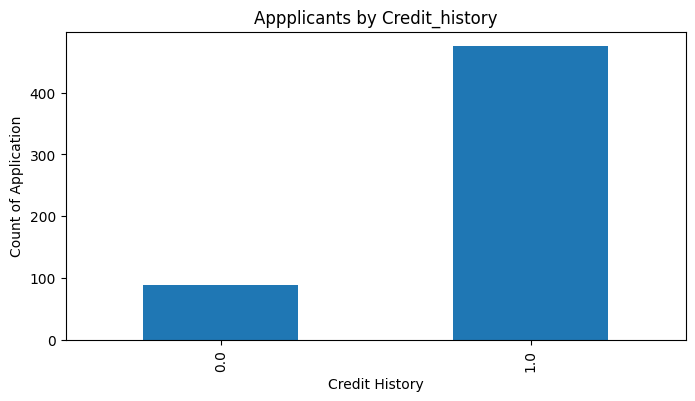

In [15]:
fig=plt.figure(figsize=(8,4))
ax1=fig.add_subplot(111) #1*1
ax1.set_xlabel('Credit History')
ax1.set_ylabel('Count of Application')
ax1.set_title('Appplicants by Credit_history')
temp1.plot(kind='bar')

<AxesSubplot: xlabel='Credit_History'>

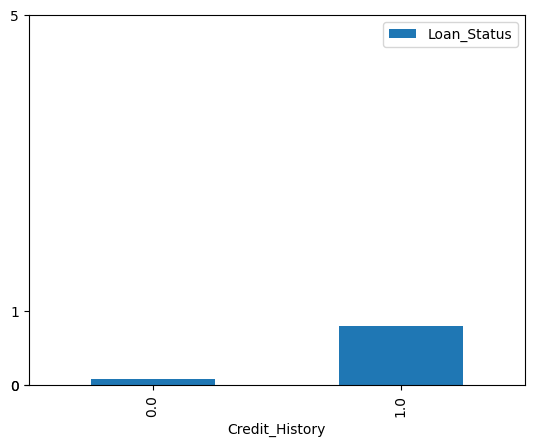

In [16]:
temp2.plot(kind='bar',yticks=[0,0,5,1])

In [17]:
temp5=pd.crosstab(df['Credit_History'],df['Loan_Status'])
temp5

Loan_Status,N,Y
Credit_History,,
0.0,82,7
1.0,97,378


<AxesSubplot: xlabel='Credit_History'>

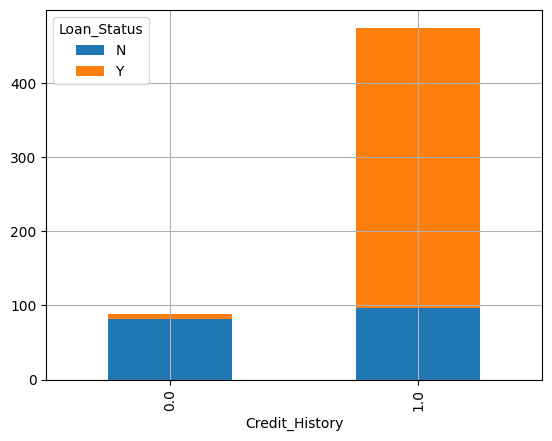

In [18]:
temp5.plot(kind='bar', stacked=True,grid=True)

In [19]:
temp6=pd.crosstab([df['Credit_History'],df['Gender']],df['Loan_Status'])
temp6

Loan_Status             N    Y
Credit_History Gender         
0.0            Female  16    1
               Male    63    6
1.0            Female  20   64
               Male    75  307

<AxesSubplot: xlabel='Credit_History,Gender'>

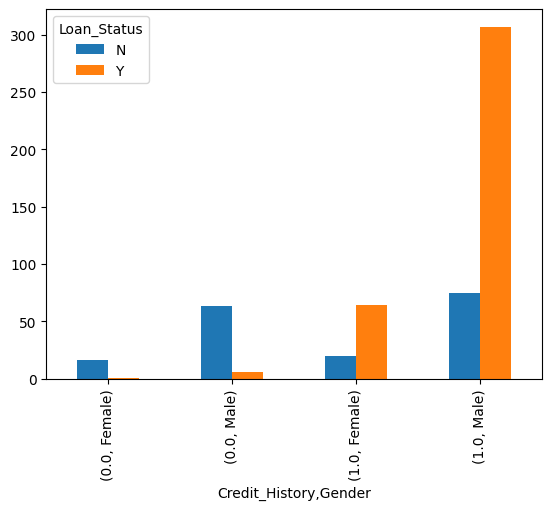

In [20]:
temp6.plot(kind='bar')

In [21]:
df.isnull().sum().sort_values(ascending=False)

Credit_History       50
Self_Employed        32
LoanAmount           22
Dependents           15
Loan_Amount_Term     14
Gender               13
Married               3
Loan_ID               0
Education             0
ApplicantIncome       0
CoapplicantIncome     0
Property_Area         0
Loan_Status           0
dtype: int64

In [22]:
df['Self_Employed'].fillna('no',inplace=True)

In [23]:
df['LoanAmount'].fillna(df['LoanAmount'].mean(),inplace=True)

In [24]:
table=df.pivot_table(values="LoanAmount",index='Self_Employed',columns='Education',aggfunc=np.median)
table

Education,Graduate,Not Graduate
Self_Employed,,
No,132.0,115.0
Yes,152.0,130.0
no,126.5,123.0


In [25]:

def fage(x):
    return table.loc[x['Self_Employed'],x['Education']]

In [26]:
df['LoanAmount'].fillna(df.apply(fage,axis=1),inplace=True)

In [27]:
df['LoanAmount_log']=np.log(df['LoanAmount'])

In [28]:
df['TotalIncome']=df['ApplicantIncome']+df['CoapplicantIncome']
df['TotalIncome_log']=np.log(df['LoanAmount'])

In [29]:
df['Gender'].fillna(df['Gender'].mode()[0],inplace=True)
df['Credit_History'].fillna(df['Credit_History'].mode()[0],inplace=True)
df['Dependents'].fillna(df['Dependents'].mode()[0],inplace=True)
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0],inplace=True)
df['Married'].fillna(df['Married'].mode()[0],inplace=True)

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             614 non-null    object 
 2   Married            614 non-null    object 
 3   Dependents         614 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      614 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    float64
 9   Loan_Amount_Term   614 non-null    float64
 10  Credit_History     614 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
 13  LoanAmount_log     614 non-null    float64
 14  TotalIncome        614 non-null    float64
 15  TotalIncome_log    614 non-null    float64
dtypes: float64(7), int64(1), o

In [31]:
from sklearn.preprocessing import LabelEncoder
var_mod=df.columns[df.dtypes==object]
var_mod

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [32]:
le=LabelEncoder()
for i in var_mod:
    df[i]=le.fit_transform(df[i])

In [33]:
df.dtypes

Loan_ID                int32
Gender                 int32
Married                int32
Dependents             int32
Education              int32
Self_Employed          int32
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area          int32
Loan_Status            int32
LoanAmount_log       float64
TotalIncome          float64
TotalIncome_log      float64
dtype: object

In [34]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,recall_score,precision_score

In [37]:
def loan_model(model,data,predictors,outcome,t_size,rs_number):
    X=data[predictors]
    y=data[outcome]
    X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=t_size,random_state=rs_number)
    model.fit(X_train,y_train)
    predictions=model.predict(X_test)
    accuracy=accuracy_score(y_test,predictions)
    recall=recall_score(y_test,predictions)
    precision=precision_score(y_test,predictions)
    print(f"Accuracy:{accuracy}")
    print(f"Recall:{recall}")
    print(f"Precision{precision}")

In [38]:
outcome_var='Loan_Status'
model=LogisticRegression()
predict_var=['Credit_History']
loan_model(model,df,predict_var,outcome_var,0.3,6)

Accuracy:0.8162162162162162
Recall:0.9921875
Precision0.79375


In [39]:
outcome_var='Loan_Status'
model2=DecisionTreeClassifier()
predict_var=['Credit_History']
loan_model(model2,df,predict_var,outcome_var,0.3,6)

Accuracy:0.8162162162162162
Recall:0.9921875
Precision0.79375


In [40]:
outcome_var='Loan_Status'
model=LogisticRegression()
predict_var=['Credit_History','Gender','Married','Education']
loan_model(model,df,predict_var,outcome_var,0.3,6)

Accuracy:0.8162162162162162
Recall:0.9921875
Precision0.79375


In [41]:
outcome_var='Loan_Status'
model3=RandomForestClassifier(n_estimators=10)
predict_var=['Credit_History','Gender','Married','Education']
loan_model(model3,df,predict_var,outcome_var,0.3,6)


Accuracy:0.8162162162162162
Recall:0.9921875
Precision0.79375


In [45]:
outcome_var='Loan_Status'
model3=RandomForestClassifier(n_estimators=10)
predict_var=['Credit_History','Gender','Married','Education','Dependents','Self_Employed','Property_Area','LoanAmount_log','TotalIncome_log']
loan_model(model3,df,predict_var,outcome_var,0.3,6)

Accuracy:0.7513513513513513
Recall:0.8671875
Precision0.7928571428571428


In [46]:
outcome_var = 'Loan_Status'
model = LogisticRegression()
predictor_var = ['Credit_History','Gender','Married','Education','Dependents','Self_Employed','Property_Area','LoanAmount_log','TotalIncome_log']
loan_model(model, df, predictor_var, outcome_var, 0.3, 66)

Accuracy:0.8216216216216217
Recall:0.9848484848484849
Precision0.8074534161490683


In [47]:
import joblib
joblib.dump(model,'LoanOrNot-LR-20230508pkl',compress=3)

['LoanOrNot-LR-20230508pkl']